In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the CSV dataset using pandas
df = pd.read_csv("dataset_stu.csv")

In [3]:
cols = pd.DataFrame(df.columns)
cols

,0
0,PRN No.
1,DSA(CSE2001) CAT1 (50)
2,DSA(CSE2001) CAT2 (50)
3,DSA(CSE2001) FAT (60)
4,DSA(CSE2001) Total (160)
...,...
208,Sem-VII & VIII %
209,Sem-VII & VIII Grade
210,Grand Total (5000)
211,%


In [11]:
import pandas as pd
import win32com.client as win32  # pip install pywin32


# Copy the contents of the dataframe to the clipboard
cols.to_clipboard()

In [48]:
#removing spaces in cells of df
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# fill null values in columns with word 'Grade' with 'F' - we knew F cuz we went through the dataset
df.loc[:, df.columns.str.contains('Grade')] = df.loc[:, df.columns.str.contains('Grade')].fillna('F')

#Capitalising all grades in Status to remove ambiguity (p and P are the same)
status_cols = [col for col in df.columns if 'Status' in col]
df[status_cols] = df[status_cols].apply(lambda x: x.str.upper())


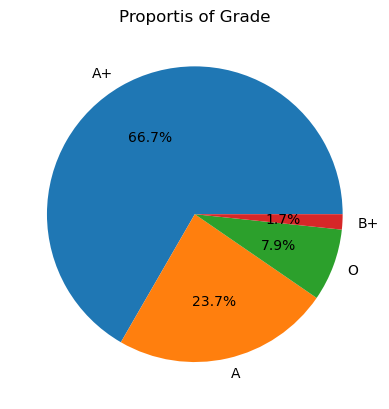

In [49]:
# Plot the distribution of the "grade" column
import matplotlib.pyplot as plt
grade_counts = df[' Grade '].value_counts()
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%')
plt.title('Proportis of Grade')
plt.show()

In [42]:
# Create a new data frame to store all sem-wise results
sem_df = df.filter(regex='^Sem')
df = df.drop(columns=df.filter(regex='^Sem').columns)

#final_df has the final statistics of a student's performance after all the semesters
final_df = df.iloc[:, -6:]
df = df.drop(df.columns[-6:], axis=1)

C:\Users\shiny\AppData\Local\Temp\ipykernel_15452\2176320457.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_totals = df[total_final_cols].mean()


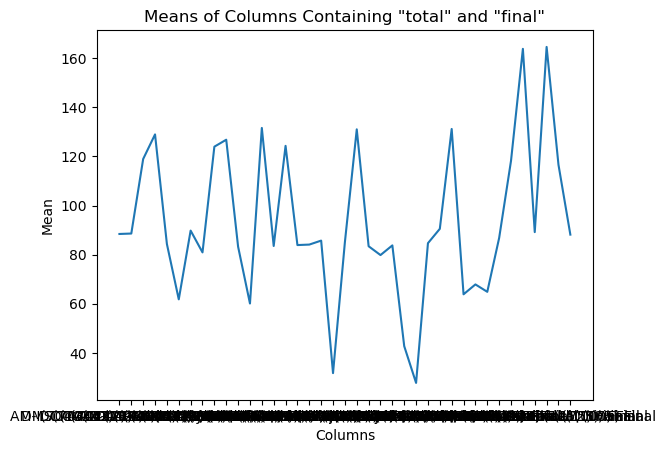

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the columns that contain both "total" and "final" in their names
total_final_cols = [col for col in df.columns if 'total' in col.lower() and 'final' in col.lower()]

# Calculate the mean of each of these columns
mean_totals = df[total_final_cols].mean()

# Plot a line graph of the means
plt.plot(mean_totals)
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Means of Columns Containing "total" and "final"')
plt.show()




In [ ]:
mean_less = 